Figures 4-A,B in Mahdavi & Siegel (2021) Indoor Air

These figures illustrate the concentration of total suspended particles (TSP) as a function of TSP content (i.e., mass of dust collected on HVAC filters) and the inverse of filtration volume in ASHRAE RP-1649 project .

Plot type: Scatter plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.container as container
import matplotlib.ticker as mtick
import numpy as np
exec(open(r'C:\PhD Research\Generic Codes\notion_corrections.py').read())

In [2]:
### Reading from the main dataframe (pm_master) and defining the x and y axes values

df = pd.read_excel(backslash_correct(r'C:\PhD Research\PhD - PSD TSP\Processed\pm_master.xlsx'))

df['inv fv'] = 1/df['filtration volume']
df['inv fv err'] = (1/df['filtration volume']) * (df['filtration volume error']/df['filtration volume'])
# df['ft'] = df['ft'].astype(str)

for f in df['ft'].unique():
    locals()['xa_%s_' %f] = df.loc[df['ft'] == f, 'TSP mass']
    locals()['xa_%s_err' %f] = df.loc[df['ft'] == f, 'TSP mass error']
    
    locals()['xb_%s_' %f] = df.loc[df['ft'] == f, 'inv fv']
    locals()['xb_%s_err' %f] = df.loc[df['ft'] == f, 'inv fv err']
        
    locals()['y_%s_' %f] = df.loc[df['ft'] == f, 'TSP Concentration']
    locals()['y_%s_err' %f] = df.loc[df['ft'] == f, 'TSP Concentration Error']
    
    
color_code = {1:'b',
              2:'r',
              3:'g',
              4:'k'}

marker_code = {1:'o',
               2:'s',
               3:'^',
               4:'D'}

label_code = {1:'8',
              2:'8E',
              3:'11',
              4:'14'}


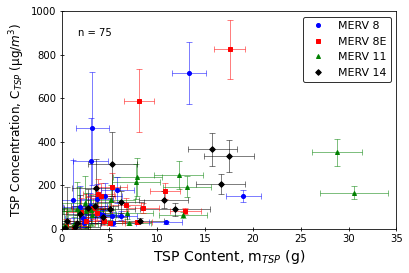

In [3]:
#### Figure 4A

plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xa_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xa_%s_err' %f],locals()['xa_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)

    
# plt.xscale('log')
plt.xlim(0, 35)
# a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(np.arange(0, 36, step=5))

# ax = plt.gca()
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'TSP Content, m$_{TSP}$ (g)', size = 14) # FIX THIS

plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1001, step=200))
plt.ylabel('TSP Concentration, C$_{TSP}$ (µg/$m^{3}$)', size = 12)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', fontsize = 11)

# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(3.5, 900, 'n = 75', ha = 'center', va = 'center', fontsize = 10)

plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_4a.jpg', format='jpg', dpi=1600, bbox_inches='tight')


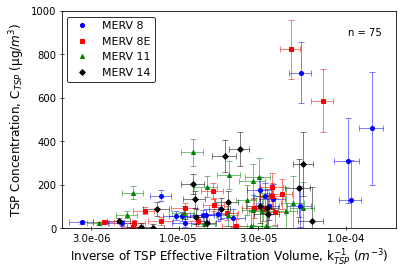

In [4]:
#### Figure 4B
plt.figure()

for f in range(1,5):
    plt.errorbar(locals()['xb_%s_' %f], 
                 locals()['y_%s_' %f], 
                 xerr = [locals()['xb_%s_err' %f],locals()['xb_%s_err' %f]],
                 yerr = [locals()['y_%s_err' %f],locals()['y_%s_err' %f]], 
                 capsize = 3, c = color_code[f], ecolor = color_code[f], lw = 0, elinewidth = 0.5, capthick = 0.5, 
                 label = 'MERV ' + label_code[f], marker = marker_code[f], ms = 4)
    
plt.xscale('log')
plt.xlim(0.000002, 0.0002)
a = [0.000003, 0.00001, 0.00003, 0.0001]
plt.xticks(ticks = a, labels = a)

ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

plt.minorticks_off()
plt.xlabel(r'Inverse of TSP Effective Filtration Volume, k$_{TSP}^{-1}$ ($m^{-3}$)', size = 12) # FIX THIS

plt.ylim(0, 1000)
plt.yticks(np.arange(0, 1001, step=200))
plt.ylabel('TSP Concentration, C$_{TSP}$ (µg/$m^{3}$)', size = 12)

plt.tick_params(axis = 'both', direction = 'inout')
# plt.ticklabel_format(style='sci', axis='both')

## The below system doesn't work in loop as it cumulatvely add labels. Should later find a solution for it.
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
new_handles = []
for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)
ax.legend(new_handles, labels, loc = 2, frameon = True, edgecolor = 'black', fontsize = 11)


# plt.legend(loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.00013, 900, 'n = 75', ha = 'center', va = 'center', fontsize = 10)

plt.savefig(r'C:/PhD Research/PhD - PSD TSP/Processed/plots/Figure_4b.jpg', format='jpg', dpi=1600, bbox_inches='tight')


End of Code